In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('input/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['Gender', 'Geography']])
df_novo = pd.concat([
    df.drop(['Gender', 'Geography'], axis=1),
    pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out())
], axis=1)

In [4]:
x = df_novo.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df_novo.Exited

In [19]:
# selecionando so hiperparametros do modelo
profundidade = np.array([5,6,7,8,15,20])
min_split = np.array([2,3,4,5,6,7,8])
criterio = ['gini', 'entropy']
parametros = {'max_depth': profundidade, 'min_samples_split': min_split, 'criterion': criterio}

modelo = DecisionTreeClassifier()

grid = GridSearchCV(estimator= modelo, param_grid= parametros, cv=5)
grid.fit(x,y)

print('Melhor score:', grid.best_score_)
print('Melhor criterio:', grid.best_estimator_.criterion)
print('Melhor profundidade:', grid.best_estimator_.max_depth)
print('Quantidade de splits:', grid.best_estimator_.min_samples_split)



Melhor score: 0.8583999999999999
Melhor criterio: entropy
Melhor profundidade: 8
Quantidade de splits: 5


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

In [33]:
modelo = DecisionTreeClassifier(criterion='entropy', min_samples_split=2, max_depth=8)
modelo.fit(x_train, y_train)
modelo.score(x_test, y_test)

0.854

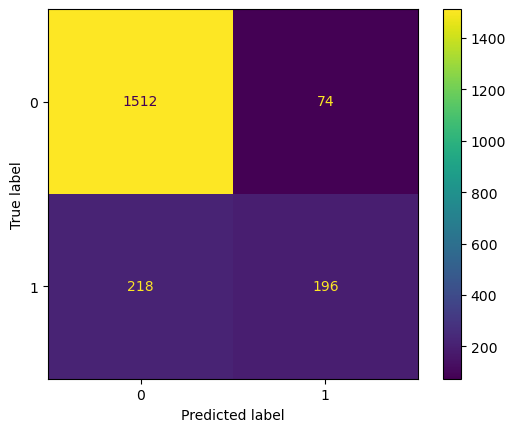

In [34]:
y_pred = modelo.predict(x_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
ConfusionMatrixDisplay(cm).plot();


In [35]:
predicoes = modelo.predict_proba(x_test)
probs = predicoes[:,1]

fpr, tpr, treshold = roc_curve(y_test, probs)

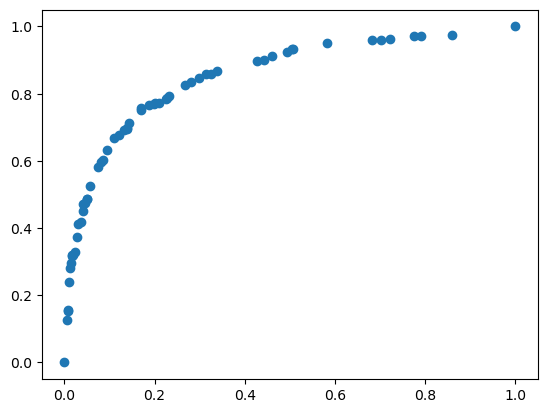

In [36]:
plt.scatter(fpr, tpr)

In [37]:
roc_auc_score(y_test, probs)

0.8586225487508452